# Classification Project - Census Dataset

In [144]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [145]:
data = pd.read_csv(r"C:\Users\ajayr\census\adult_final.csv") #Read data
print("Number of Observations in adult dataset:", data.shape)
data.head()

Number of Observations in adult dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,<=50K
1,82,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K
2,66,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,<=50K
3,54,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41,Private,264663.0,Some-college,10.0,Separated,NaN,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K


DATA DESCRIPTION

age: the age of an individual.

workclass: a general term to represent the employment status of an individual.

fnlwgt: final weight. In other words, this is the number of people the census believes
the entry represents.

education: the highest level of education achieved by an individual.

education.num: the highest level of education achieved in numerical form.

marital.status: marital status of an individual. 

occupation: the general type of occupation of an individual

relationship: represents what this individual is relative to others.

race: Descriptions of an individual’s race

sex: the biological sex of the individual

capital.gain: capital gains for an individual

capital.loss: capital loss for an individual

hours.per.week: the hours an individual has reported to work per week

native.country: country of origin for an individual

the label: whether or not an individual makes more than $50,000 annually.

In [146]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.246200e+04,32454.000000,31972.000000,32255.000000,32472.000000
mean,38.581647,1.897666e+05,10.080945,1097.501689,88.132073,40.440564
std,13.640433,1.055199e+05,2.572442,7451.549115,404.777028,12.349787
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369938e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [147]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152.0,NaN,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
32557,27,Private,257302.0,NaN,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32558,40,Private,154374.0,NaN,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32559,58,Private,151910.0,NaN,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32560,22,Private,201490.0,NaN,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32543 non-null object
fnlwgt            32462 non-null float64
education         32448 non-null object
education.num     32454 non-null float64
marital.status    32535 non-null object
occupation        32530 non-null object
relationship      32499 non-null object
race              32482 non-null object
sex               32561 non-null object
capital.gain      31972 non-null float64
capital.loss      32255 non-null float64
hours.per.week    32472 non-null float64
native.country    32550 non-null object
income            32561 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 3.7+ MB


Checking for NULL values in the dataset

In [149]:
data.isnull().sum()

age                 0
workclass          18
fnlwgt             99
education         113
education.num     107
marital.status     26
occupation         31
relationship       62
race               79
sex                 0
capital.gain      589
capital.loss      306
hours.per.week     89
native.country     11
income              0
dtype: int64

### Handling missing values

In [150]:
def HandleMissingValues(df):
    # for Object columns fill using 'Unknown'
    # for Numeric columns fill using 'median'
    num_cols = ['fnlwgt','capital.gain','capital.loss','hours.per.week']
    cat_cols = ['workclass','marital.status','occupation','relationship','race','native.country']
    values = {}
    for a in cat_cols:
        values[a] = 'Unknown'

    for a in num_cols:
        values[a] = data[a].median()
        
    data.fillna(value=values,inplace=True)
    
    
HandleMissingValues(data)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,<=50K
1,82,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K
2,66,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,<=50K
3,54,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41,Private,264663.0,Some-college,10.0,Separated,Unknown,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K


In [151]:
data['education'].unique()
data['education.num'].unique()

array([ 9., 10.,  4.,  6., 16., 15., 13., 14.,  7., 12., 11.,  2.,  3.,
        8.,  5.,  1., nan])

In [152]:
dict = {"HS-grad":9,"Some-college":10,"7th-8th":4,"10th":6,"Doctorate":16,"Prof-school":15,"Bachelors":13,"11th":7,"Masters":14,"Assoc-acdm":12,"1st-4th":2,"5th-6th":3,"Assoc-voc":11,"12th":8,"9th":5,"Preschool":1}

In [153]:
inv_dict = {v: k for k, v in dict.items()}
print(inv_dict)

{9: 'HS-grad', 10: 'Some-college', 4: '7th-8th', 6: '10th', 16: 'Doctorate', 15: 'Prof-school', 13: 'Bachelors', 7: '11th', 14: 'Masters', 12: 'Assoc-acdm', 2: '1st-4th', 3: '5th-6th', 11: 'Assoc-voc', 8: '12th', 5: '9th', 1: 'Preschool'}


In [154]:
data['education']=data['education'].fillna(data['education.num'].map(inv_dict))
data['education.num']=data['education.num'].fillna(data['education'].map(dict))

In [155]:
# Check if ? is present
for col in data:
    print(f"? in {col}: {data[(data[col] == '?')].any().sum()}")

? in age: 0
? in workclass: 15
? in fnlwgt: 0
? in education: 0
? in education.num: 0
? in marital.status: 0
? in occupation: 15
? in relationship: 0
? in race: 0
? in sex: 0
? in capital.gain: 0
? in capital.loss: 0
? in hours.per.week: 0
? in native.country: 15
? in income: 0


In [156]:
#Replacing ?' with 'unknown'

edit_column = ['workclass' , 'occupation' , 'native.country']
for col in edit_column:
    data.loc[data[col] == '?', col] = 'unknown'
    

# verify if ? is present
for col in data:
    print(f"? in {col}: {data[(data[col] == '?')].any().sum()}")

? in age: 0
? in workclass: 0
? in fnlwgt: 0
? in education: 0
? in education.num: 0
? in marital.status: 0
? in occupation: 0
? in relationship: 0
? in race: 0
? in sex: 0
? in capital.gain: 0
? in capital.loss: 0
? in hours.per.week: 0
? in native.country: 0
? in income: 0


In [157]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [158]:
data['income'].value_counts(dropna=False, normalize=True).head()

#checking for balance of the target. It shows the target is imbalance.

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [159]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})
data.head()

#mapping the target the variable

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unknown,77053.0,HS-grad,9.0,Widowed,unknown,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0
1,82,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0
2,66,unknown,186061.0,Some-college,10.0,Widowed,unknown,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0
3,54,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0
4,41,Private,264663.0,Some-college,10.0,Separated,Unknown,Own-child,White,Female,0.0,3900.0,40.0,United-States,0


In [160]:
#Separate categorical and numerical columns
cat_column = data.dtypes[data.dtypes == 'object']
num_column = data.dtypes[data.dtypes != 'object']

In [161]:
for col in list(cat_column.index):
    print(f"--------------------{col.title()}-------------------------")
    total= data[col].value_counts()
    percent = total / data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')


--------------------Workclass-------------------------
                  total   percent
Private           22685  0.696692
Self-emp-not-inc   2539  0.077977
Local-gov          2089  0.064157
unknown            1836  0.056386
State-gov          1297  0.039833
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Unknown              18  0.000553
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--

In [162]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [163]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['Preschool','1st-4th','5th-6th','7th-8th']

#replace elements in list.
data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

data['education'].value_counts()

HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1198
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Name: education, dtype: int64

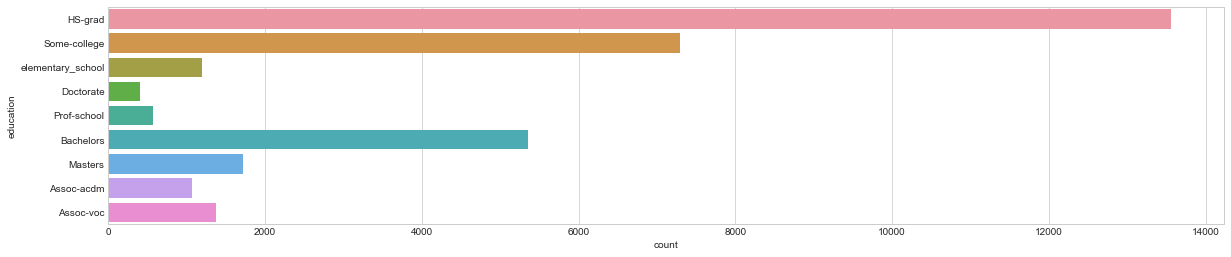

In [164]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="education", data=data);

In [165]:
data['marital.status'].value_counts()

Married-civ-spouse       14950
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Unknown                     26
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [166]:
married= ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
separated = ['Separated','Divorced','Widowed']

#replace elements in list.
data['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital.status'].value_counts()

Married          15391
Never-married    10683
Separated         6461
Unknown             26
Name: marital.status, dtype: int64

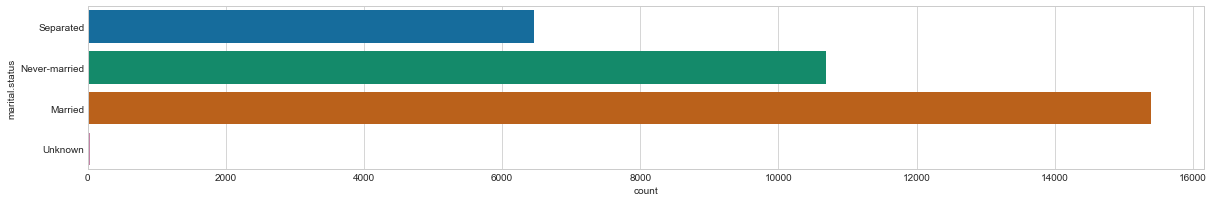

In [167]:
plt.figure(figsize=(20,3)) 
sns.countplot(y="marital.status", data=data);

In [168]:
data['workclass'].value_counts()

Private             22685
Self-emp-not-inc     2539
Local-gov            2089
unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Unknown                18
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [169]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

data['workclass'].replace(to_replace= self_employed, value='Self_Employed', inplace=True)
data['workclass'].replace(to_replace= govt_employees, value='Govt_Employees', inplace=True)

data['workclass'].value_counts()

Private           22685
Govt_Employees     4346
Self_Employed      3655
unknown            1836
Unknown              18
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

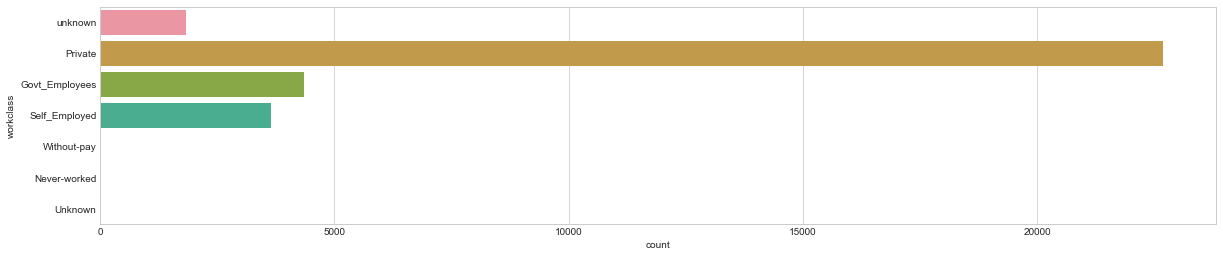

In [170]:
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=data);

In [171]:
data['native.country'].value_counts()

United-States                 29159
Mexico                          643
unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [172]:
US = ['United-States']

NON_US = ['Mexico','unknown','Philippines','Germany','Canada','Puerto-Rico','El-Salvador','India','Cuba','England','Jamaica',
          'South','China','Italy','Dominican-Republic','Vietnam','Guatemala','Japan','Poland','Columbia','Taiwan','Haiti',
          'Iran','Portugal','Nicaragua','Peru','Greece','France','Ecuador','Ireland','Hong','Cambodia','Trinadad&Tobago',
          'Laos','Thailand','Yugoslavia','Outlying-US(Guam-USVI-etc)','Honduras','Hungary','Scotland','Holand-Netherlands']

data['native.country'].replace(to_replace= US, value= 'US', inplace=True)
data['native.country'].replace(to_replace= NON_US, value= 'NON_US', inplace=True)

data['native.country'].value_counts()

US         29159
NON_US      3391
Unknown       11
Name: native.country, dtype: int64

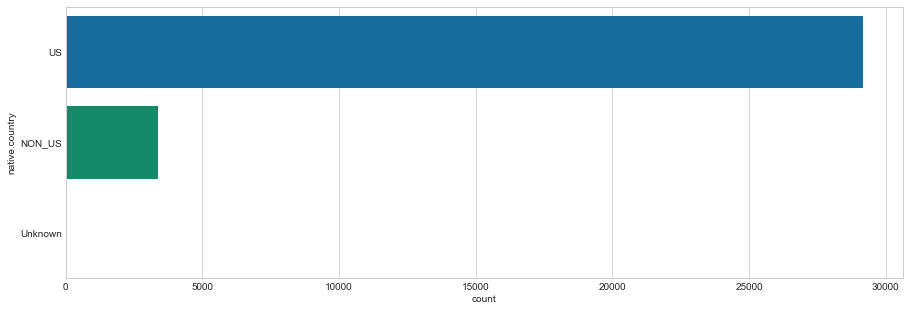

In [173]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(15,5)) 
sns.countplot(y="native.country", data=data);

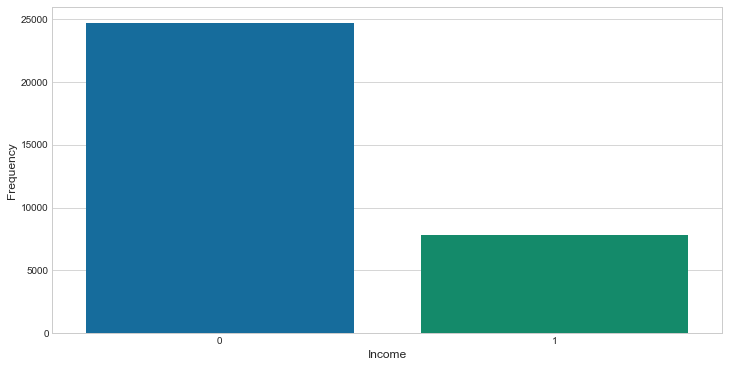

In [174]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

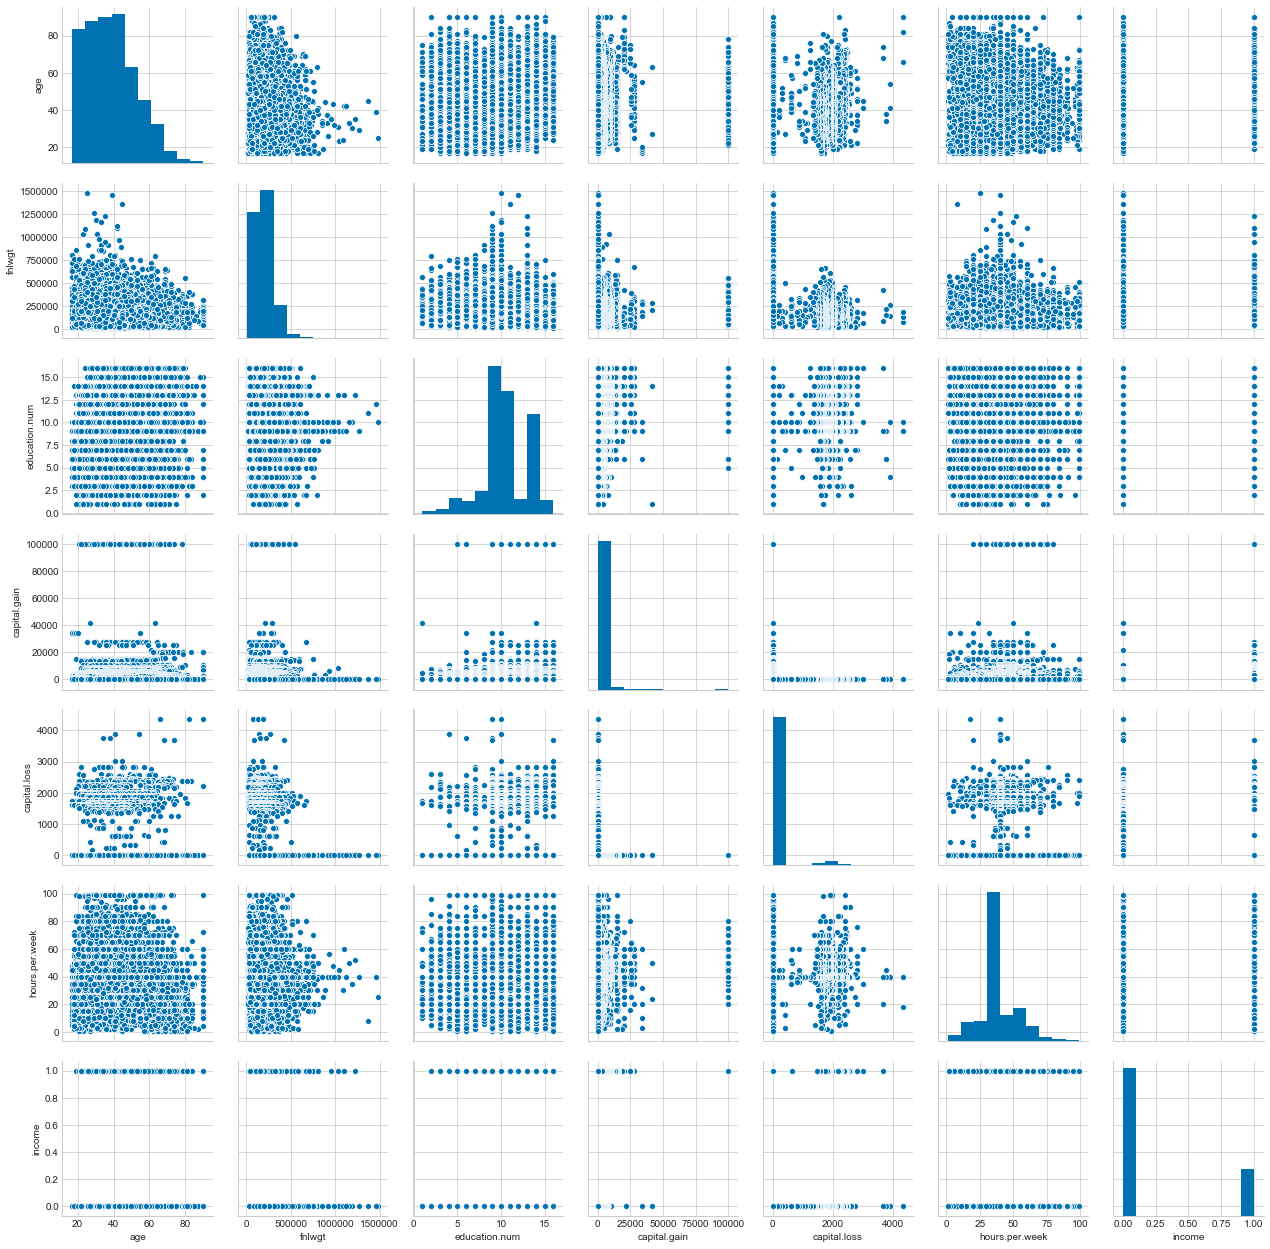

In [175]:
sns.pairplot(data)
plt.show()

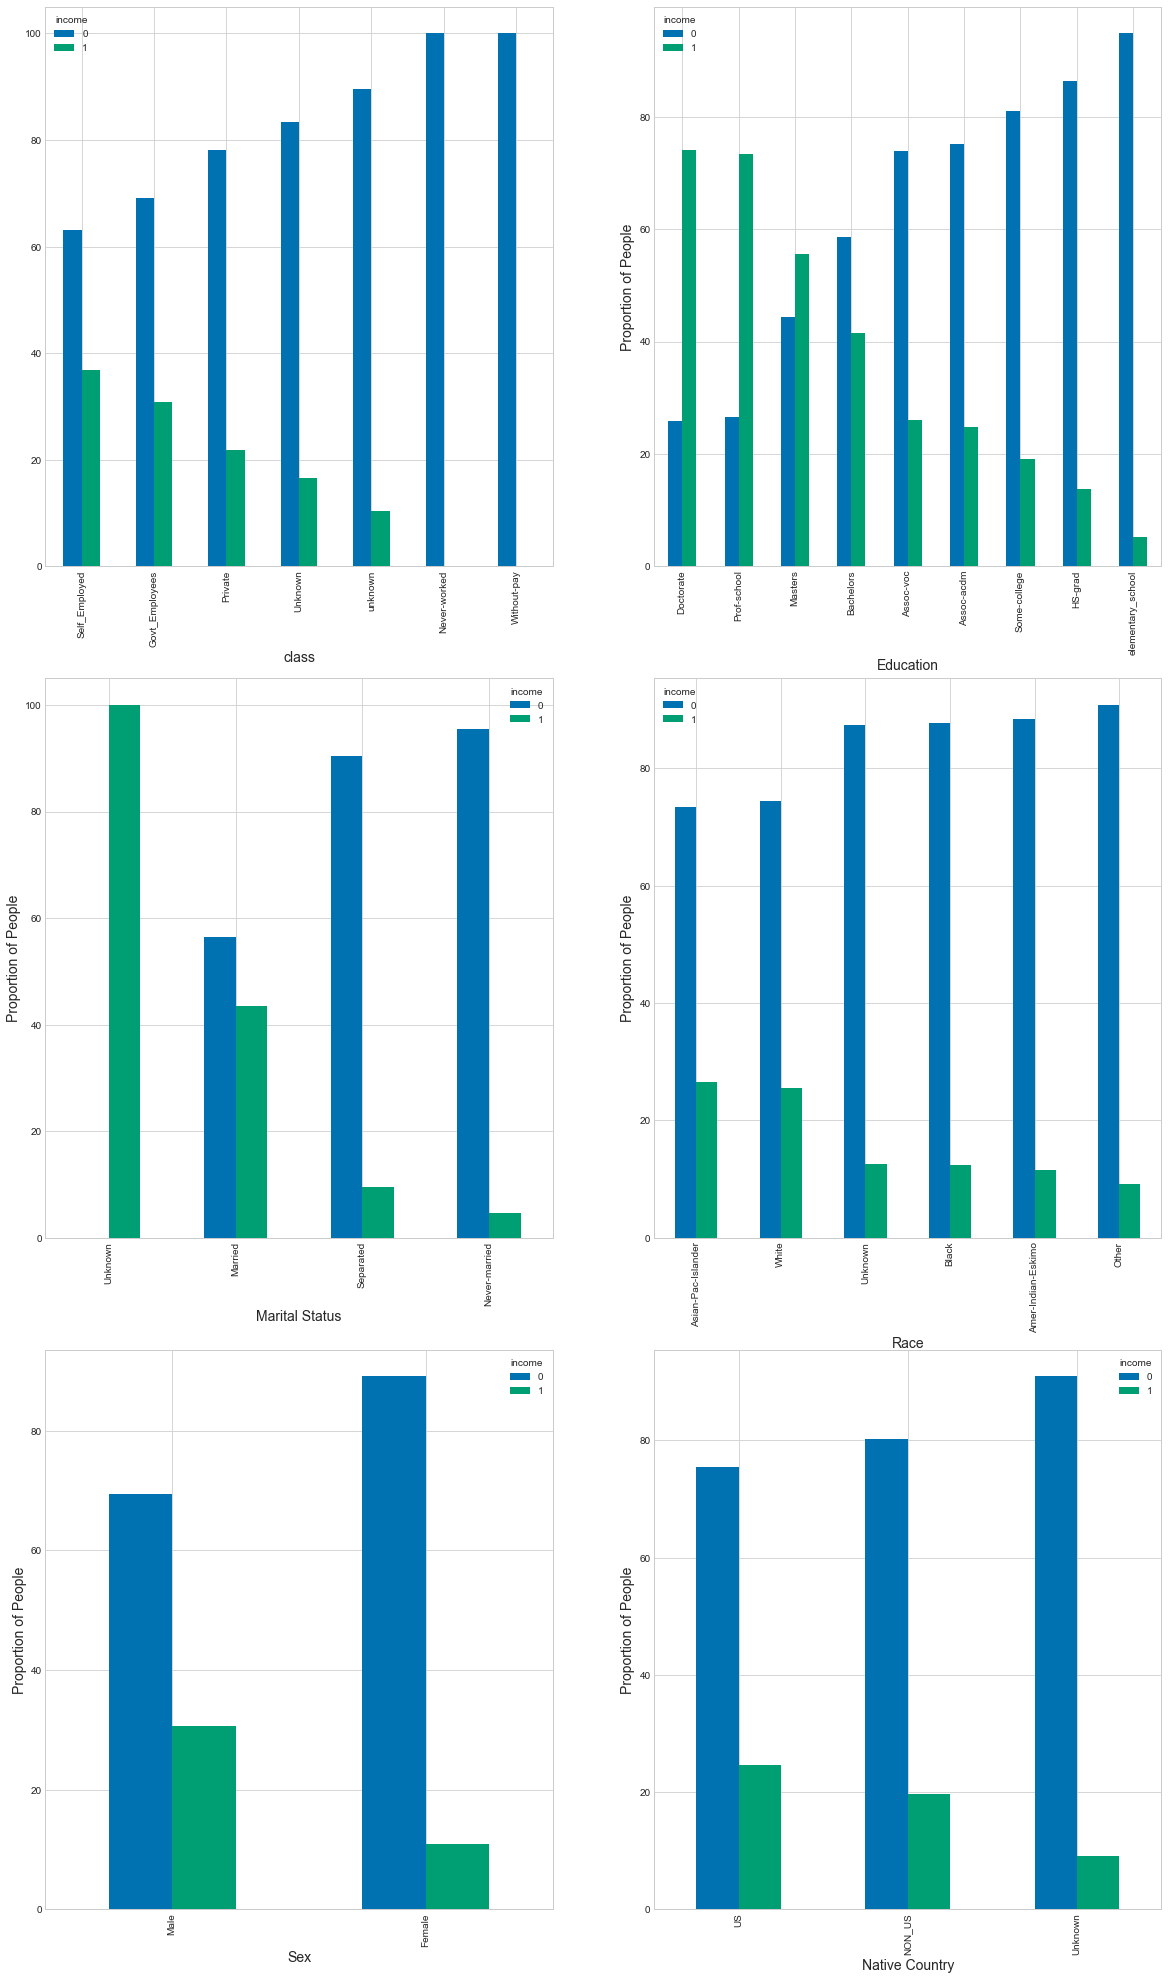

In [176]:
table_class = pd.crosstab(data['workclass'], data['income'])
table_edu = pd.crosstab(data['education'], data['income'])
table_marital = pd.crosstab(data['marital.status'], data['income'])
table_race = pd.crosstab(data['race'],data['income'])
table_sex = pd.crosstab(data['sex'], data['income'])
table_country = pd.crosstab(data['native.country'], data['income'])

fig = plt.figure(figsize = (20,35))

ax = fig.add_subplot(321)
(table_class.div(table_class.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("class",fontsize = 14);

ax = fig.add_subplot(322)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(323)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(324)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(325)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(326)
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);



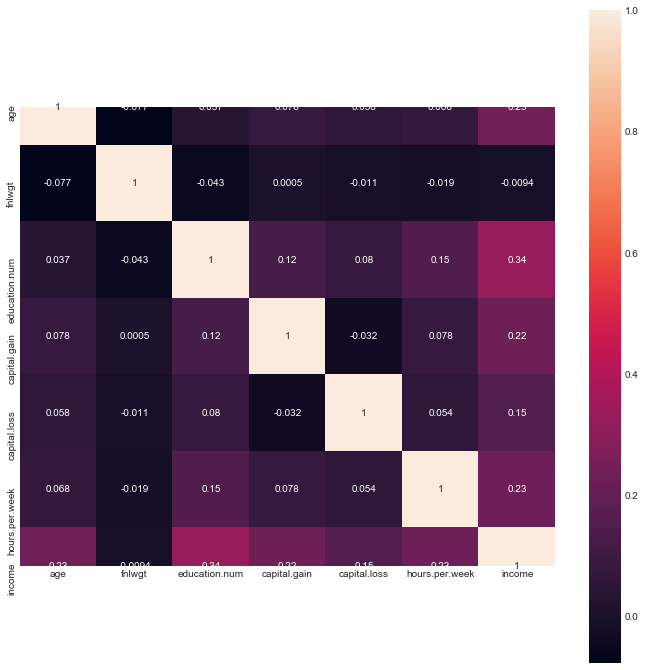

In [177]:
fig = plt.figure(figsize = (12,12))

sns.heatmap(data[list(num_column.index)].corr(),annot = True,square = True);

In [178]:
num_col_update = ['age','fnlwgt', 'capital.gain','capital.loss','hours.per.week']
cat_col_update = ['workclass', 'education','marital.status', 'occupation','relationship',
                'race' ,'sex' ,'native.country','income']

In [179]:
#using Robust scaler because as we saw from the various trends that different features have different scale.
#reason for using Robust scaler is that it is not senstitve for outliers
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
scaler = RobustScaler()
pd.DataFrame(scaler.fit_transform(data[num_col_update]),columns = num_col_update).head(3)

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
0,2.65,-0.852590,0.0,4356.0,0.0
1,2.25,-0.382916,0.0,4356.0,-4.4
2,1.45,0.064661,0.0,4356.0,0.0


In [180]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_update
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_update)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [181]:
num_df = pipeline.fit_transform(data)
num_df.shape
cols = ['']

In [182]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_update)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(data)
cat_df.shape

(32561, 55)

In [183]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [184]:
finaldata = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {finaldata.shape}")

Number of observations in final dataset: (32561, 61)


In [185]:
y = finaldata['income']
finaldata.drop(labels = ['id','income'],axis = 1,inplace = True)
X = finaldata

In [186]:
report_reg1 = pd.DataFrame(index = '0 1 2 3 4 5 6 7 8 9 10 11 12'.split(), columns='ModelName TrainScore TestScore MeanSquaredError RSquareScore'.split())

In [187]:
report_reg1

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [188]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 42)

In [190]:
#Without Hyper Parameters Tuning
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8463507011976661
Recall Score: 0.7318960751796573
Precision Score: 0.5658119658119658
ROC_AUC curve: 0.8021289421124417
Confusion Matrix:
 [[6944 1016]
 [ 485 1324]]


In [191]:
report_reg1['ModelName']['0'] = 'Logistic Regression'
report_reg1['TrainScore']['0'] = model.score(X_train, y_train)
report_reg1['TestScore']['0'] = model.score(X_test, y_test)
report_reg1['MeanSquaredError']['0'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['0'] = metrics.r2_score(y_test,prediction)

In [192]:
#With Hyper Parameters Tuning
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'penalty' : ['l1', 'l2']
         }
model1 = GridSearchCV(model, param_grid=params, n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done  42 out of  42 | elapsed:    5.7s finished


Best Hyper Parameters: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.8503429214863343
Recall Score: 0.7367853290183387
Precision Score: 0.5837606837606838
ROC_AUC curve: 0.8068639216159286
Confusion Matrix:
 [[6941  974]
 [ 488 1366]]


In [193]:
report_reg1['ModelName']['1'] = 'Logistic Regression with gridcv'
report_reg1['TrainScore']['1'] = model1.score(X_train, y_train)
report_reg1['TestScore']['1'] = model1.score(X_test, y_test)
report_reg1['MeanSquaredError']['1'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['1'] = metrics.r2_score(y_test,prediction)

# Decision Tree

In [194]:
#Without Hyper Parameters Tuning
#DesicionTree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8106254478452247
Recall Score: 0.602768456375839
Precision Score: 0.6141025641025641
ROC_AUC curve: 0.7402467874296257
Confusion Matrix:
 [[6482  903]
 [ 947 1437]]


In [195]:
report_reg1['ModelName']['2'] = 'Decision Tree'
report_reg1['TrainScore']['2'] = model.score(X_train, y_train)
report_reg1['TestScore']['2'] = model.score(X_test, y_test)
report_reg1['MeanSquaredError']['2'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['2'] = metrics.r2_score(y_test,prediction)

In [196]:
#With Hyper Parameters Tuning
#DesicionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
          'random_state':[123]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 276 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 682 tasks      | elapsed:    6.6s


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.8393899068481933
Recall Score: 0.7171830985915493
Precision Score: 0.544017094017094
ROC_AUC curve: 0.7918539961309009
Confusion Matrix:
 [[6927 1067]
 [ 502 1273]]


[Parallel(n_jobs=8)]: Done 714 out of 729 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 729 out of 729 | elapsed:    7.0s finished


In [197]:
report_reg1['ModelName']['3'] = 'Decision Tree with gridcv'
report_reg1['TrainScore']['3'] = model1.score(X_train, y_train)
report_reg1['TestScore']['3'] = model1.score(X_test, y_test)
report_reg1['MeanSquaredError']['3'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['3'] = metrics.r2_score(y_test,prediction)

# KNN Neighbors

In [198]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8174838775719111
Confusion Matrix:
 [[6702 1056]
 [ 727 1284]]


In [199]:
report_reg1['ModelName']['4'] = 'KNN'
report_reg1['TrainScore']['4'] = model.score(X_train, y_train)
report_reg1['TestScore']['4'] = model.score(X_test, y_test)
report_reg1['MeanSquaredError']['4'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['4'] = metrics.r2_score(y_test,prediction)

In [200]:
#With Hyper Parameters Tuning and grid search
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params = {'n_neighbors':[5,7,8,9,10,3,12,1],
          'leaf_size':[10,12,14,30,50,100]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   59.5s
[Parallel(n_jobs=8)]: Done 144 out of 144 | elapsed:  4.8min finished


Best Hyper Parameters:
 {'leaf_size': 10, 'n_neighbors': 12}
Accuracy: 0.8269014228682567
Confusion Matrix:
 [[6936 1198]
 [ 493 1142]]


In [201]:
report_reg1['ModelName']['5'] = 'KNN with gridcv'
report_reg1['TrainScore']['5'] = model1.score(X_train, y_train)
report_reg1['TestScore']['5'] = model1.score(X_test, y_test)
report_reg1['MeanSquaredError']['5'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['5'] = metrics.r2_score(y_test,prediction)

In [202]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
dc_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
dc_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('dc', dc_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, dc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8463507011976661
KNeighborsClassifier 0.8243423072985976
DecisionTreeClassifier 0.8083734261439247
VotingClassifier 0.8448152318558706


In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

In [204]:
ga_clf = GaussianNB()
ga_clf.fit(X_train, y_train)
et_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
et_clf.fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rf_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('ga', ga_clf), ('et', et_clf), ('rf', rf_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (ga_clf, et_clf, rf_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

GaussianNB 0.6013921588698946
ExtraTreesClassifier 0.8237281195618794
RandomForestClassifier 0.8467601596888116
VotingClassifier 0.8166649605896202


In [205]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8494216398812571


In [206]:
report_reg1['ModelName']['6'] = 'Bagging with Decision Tree Classifier'
report_reg1['TrainScore']['6'] = bag_clf.score(X_train, y_train)
report_reg1['TestScore']['6'] = bag_clf.score(X_test, y_test)
report_reg1['MeanSquaredError']['6'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['6'] = metrics.r2_score(y_test,prediction)

In [207]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.8083734261439247


In [208]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
et_clf = ExtraTreesClassifier(random_state=0)
bag_clf = BaggingClassifier(et_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8318149247620023


In [209]:
report_reg1['ModelName']['7'] = 'Bagging with Decision Tree Classifier'
report_reg1['TrainScore']['7'] = bag_clf.score(X_train, y_train)
report_reg1['TestScore']['7'] = bag_clf.score(X_test, y_test)
report_reg1['MeanSquaredError']['7'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['7'] = metrics.r2_score(y_test,prediction)

In [210]:
tree_clf = ExtraTreesClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.8237281195618794


In [211]:
from sklearn.ensemble import BaggingClassifier
log_clf = LogisticRegression(random_state=0)
bag_clf = BaggingClassifier(log_clf, random_state=0, bootstrap=False)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8463507011976661


In [212]:
report_reg1['ModelName']['8'] = 'Pasting with Logistic Regression'
report_reg1['TrainScore']['8'] = bag_clf.score(X_train, y_train)
report_reg1['TestScore']['8'] = bag_clf.score(X_test, y_test)
report_reg1['MeanSquaredError']['8'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['8'] = metrics.r2_score(y_test,prediction)

In [213]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
et_clf = ExtraTreesClassifier(random_state=0)
bag_clf = BaggingClassifier(et_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8318149247620023


In [214]:
report_reg1['ModelName']['9'] = 'Pasting with Decision Tree'
report_reg1['TrainScore']['9'] = bag_clf.score(X_train, y_train)
report_reg1['TestScore']['9'] = bag_clf.score(X_test, y_test)
report_reg1['MeanSquaredError']['9'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['9'] = metrics.r2_score(y_test,prediction)

In [215]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [216]:
y_pred = ada_clf.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_pred, y_test)))

Accuracy: 0.8619101238611936


In [217]:
report_reg1['ModelName']['10'] = 'Adaboost with Decision tree Classifier'
report_reg1['TrainScore']['10'] = ada_clf.score(X_train, y_train)
report_reg1['TestScore']['10'] = ada_clf.score(X_test, y_test)
report_reg1['MeanSquaredError']['10'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['10'] = metrics.r2_score(y_test,prediction)

In [218]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf_2 = AdaBoostClassifier(LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [219]:
y_pred = ada_clf_2.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_pred, y_test)))

Accuracy: 0.8290510799467704


In [220]:
report_reg1['ModelName']['11'] = 'Adaboost with Logistic Regression'
report_reg1['TrainScore']['11'] = ada_clf_2.score(X_train, y_train)
report_reg1['TestScore']['11'] = ada_clf_2.score(X_test, y_test)
report_reg1['MeanSquaredError']['11'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['11'] = metrics.r2_score(y_test,prediction)

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
GBC_obj = GradientBoostingClassifier(learning_rate = 0.05,
                                     max_depth = 3,
                                     min_samples_leaf = 5,
                                     min_samples_split = 4,
                                     n_estimators = 500,
                                     random_state=42)
GBC_opt = GBC_obj.fit(X_train, y_train)

In [223]:
y_pred = GBC_opt.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_pred, y_test)))

Accuracy: 0.8723513153854028


In [224]:
report_reg1['ModelName']['12'] = 'Gradientboosting'
report_reg1['TrainScore']['12'] = GBC_opt.score(X_train, y_train)
report_reg1['TestScore']['12'] = GBC_opt.score(X_test, y_test)
report_reg1['MeanSquaredError']['12'] = metrics.mean_squared_error(y_test,prediction)
report_reg1['RSquareScore']['12'] = metrics.r2_score(y_test,prediction)

In [225]:
report_reg1

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,Logistic Regression,0.848017,0.846351,0.153649,0.156501
1,Logistic Regression with gridcv,0.851176,0.850343,0.149657,0.178417
2,Decision Tree,0.999956,0.810625,0.189375,-0.0396224
3,Decision Tree with gridcv,0.857538,0.83939,0.16061,0.118288
4,KNN,0.872236,0.817484,0.182516,-0.0019712
5,KNN with gridcv,0.851044,0.826901,0.173099,0.0497289
6,Bagging with Decision Tree Classifier,0.851307,0.849422,0.173099,0.0497289
7,Bagging with Decision Tree Classifier,0.837487,0.831815,0.173099,0.0497289
8,Pasting with Logistic Regression,0.848017,0.846351,0.173099,0.0497289
9,Pasting with Decision Tree,0.836916,0.831815,0.173099,0.0497289


### Keras Classifier

In [80]:
dropout = 0.1
epochs = 10
batch_size = 10
optimizer = 'adam'
k = 5

In [81]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
max = accuracies.max()

Using TensorFlow backend.


Epoch 1/10
18233/18233 [==============================] - 2s 98us/step - loss: 0.3871 - accuracy: 0.8201
Epoch 2/10
18233/18233 [==============================] - 2s 86us/step - loss: 0.3472 - accuracy: 0.8356
Epoch 3/10
18233/18233 [==============================] - 2s 82us/step - loss: 0.3379 - accuracy: 0.8419
Epoch 4/10
18233/18233 [==============================] - 2s 83us/step - loss: 0.3324 - accuracy: 0.8452
Epoch 5/10
18233/18233 [==============================] - 2s 84us/step - loss: 0.3285 - accuracy: 0.8461
Epoch 6/10
18233/18233 [==============================] - 2s 88us/step - loss: 0.3260 - accuracy: 0.8487
Epoch 7/10
18233/18233 [==============================] - 2s 87us/step - loss: 0.3255 - accuracy: 0.8489
Epoch 8/10
18233/18233 [==============================] - 2s 89us/step - loss: 0.3224 - accuracy: 0.8493
Epoch 9/10
18233/18233 [==============================] - 2s 86us/step - loss: 0.3224 - accuracy: 0.8499
Epoch 10/10
4559/4559 [==============================] 

### *

######    "Based on the test and train score from the above table we conclude that "Gradient Boosting" is the best model for our dataset"